In [1]:
# libraries for analysis
import pandas as pd  # linear algebra
import numpy as np  # data processing
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization
import warnings  # ignore warnings
import time  # time.sleep
from subprocess import check_output  # check output


warnings.filterwarnings("ignore")  # ignore warningsx


## Data Content
1. **ID number**
1. **Diagnosis (M = malignant, B = benign)**
1. **radius (mean of distances from center to points on the perimeter)**
1. **texture (standard deviation of gray-scale values)**
1. **perimeter**
1. **area**
1. **smoothness (local variation in radius lengths)**
1. **compactness (perimeter^2 / area - 1.0)**
1. **concavity (severity of concave portions of the contour)**
1. **concave points (number of concave portions of the contour)**
1. **symmetry**
1. **fractal dimension ("coastline approximation" - 1)**

* The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
* All feature values are recoded with four significant digits.
* Missing attribute values: none
* Class distribution: 357 benign, 212 malignant

In [2]:
# import the data
cancer = pd.read_csv("data\cancer.csv")
df = cancer.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**There are three points that catch our attention:** 
<br>
&emsp;1- **Unnamed: 32** We don't need it because all its values are null.
<br>
&emsp;2- **id** We cannot use it for classification.
<br>
&emsp;3- **diagnosis** It will be our class label.

In [3]:
# checking null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**As you can see we dont have null values in our dateframe. Thats amazing. let go to keep analyze it.**

In [4]:
columns = df.columns # columns of the data
print(columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
y = df.diagnosis  # M or B
drop_list = ["id", "diagnosis", "Unnamed: 32"]
x = df.drop(drop_list, axis=1)  # drop the columns
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y = pd.DataFrame(y)  # convert to dataframe
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


Number of Benign:  357
Number of Malignant :  212


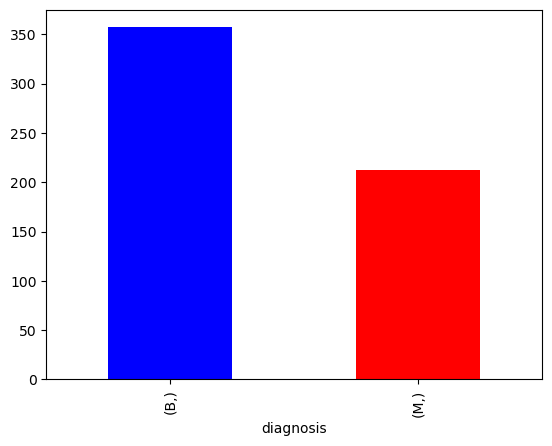

In [7]:
# showing barplot of the  y data
y.value_counts().plot(kind="bar", color=["blue", "red"])
B, M = y.value_counts()
print("Number of Benign: ", B)
print("Number of Malignant : ", M)

Okey, now we have features but **what does they mean** or actually **how much do we need to know about these features**    
  
The answer is that we do not need to know meaning of these features however in order to imagine in our mind we should know something like variance, standart deviation, number of sample (count) or max min values.  
  
These type of information helps to understand about what is going on data. For example , the question is appeared in my mind the **area_mean** feature's max value is 2500 and **smoothness_mean** features' max 0.16340. Therefore **do we need standardization or normalization before visualization, feature selection, feature extraction or classificaiton?** The answer is yes and no not surprising ha :) Anyway lets go step by step and start with visualization.  

In [8]:
x.describe().T  # descriptive statistics

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
# standardization of the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_std = sc.fit_transform(x)
# convert to dataframe
x_std = pd.DataFrame(x_std, columns=x.columns)
x_std.head()




,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [11]:
"""We have too much fetures. we can split the features as 3 groups"""

first_10_features = x_std.iloc[:, :10]
second_10_features = x_std.iloc[:, 10:20]
third_10_features = x_std.iloc[:, 20:]

In [17]:
concated_first = pd.concat([first_10_features, y], axis=1)
concated_second = pd.concat([second_10_features, y], axis=1)
concated_third = pd.concat([third_10_features, y], axis=1)
concated_first.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,M
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,M
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,M
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,M
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,M


In [18]:
concated_second.head()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,diagnosis
0,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,M
1,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,M
2,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,M
3,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,M
4,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,M


In [19]:
concated_third.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,M
2,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,M
3,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,M
4,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,M


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

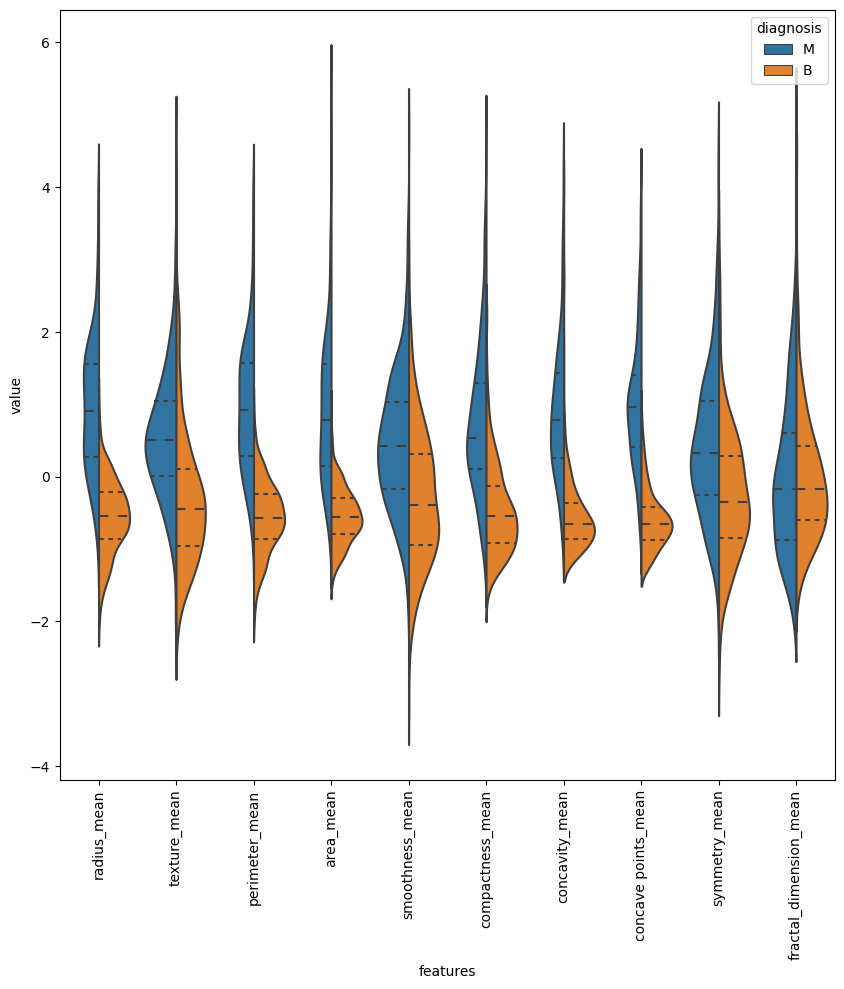

In [34]:
# Melt the DataFrame using the pd.melt() function to reshape it from wide to long format for visualization
data1 = pd.melt(concated_first, id_vars="diagnosis", var_name="features", value_name="value")

# Create a new figure for the violin plot with a specified size of 10x10 inches
plt.figure(figsize=(10, 10))

# Create a violin plot using seaborn's violinplot() function
# Set the x-axis to the "features" column, y-axis to the "value" column, and hue to the "diagnosis" column
# Use data as the input DataFrame for plotting
# Set split=True to separate the violins for different values of "diagnosis"
# Set inner="quart" to show quartiles inside the violins
sns.violinplot(x="features", y="value", hue="diagnosis", data=data1, split=True, inner="quart")

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)



Lets interpret the plot above together. For example, in **texture_mean** feature, median of the *Malignant* and *Benign* looks like separated so it can be good for classification. However, in **fractal_dimension_mean** feature,  median of the *Malignant* and *Benign* does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

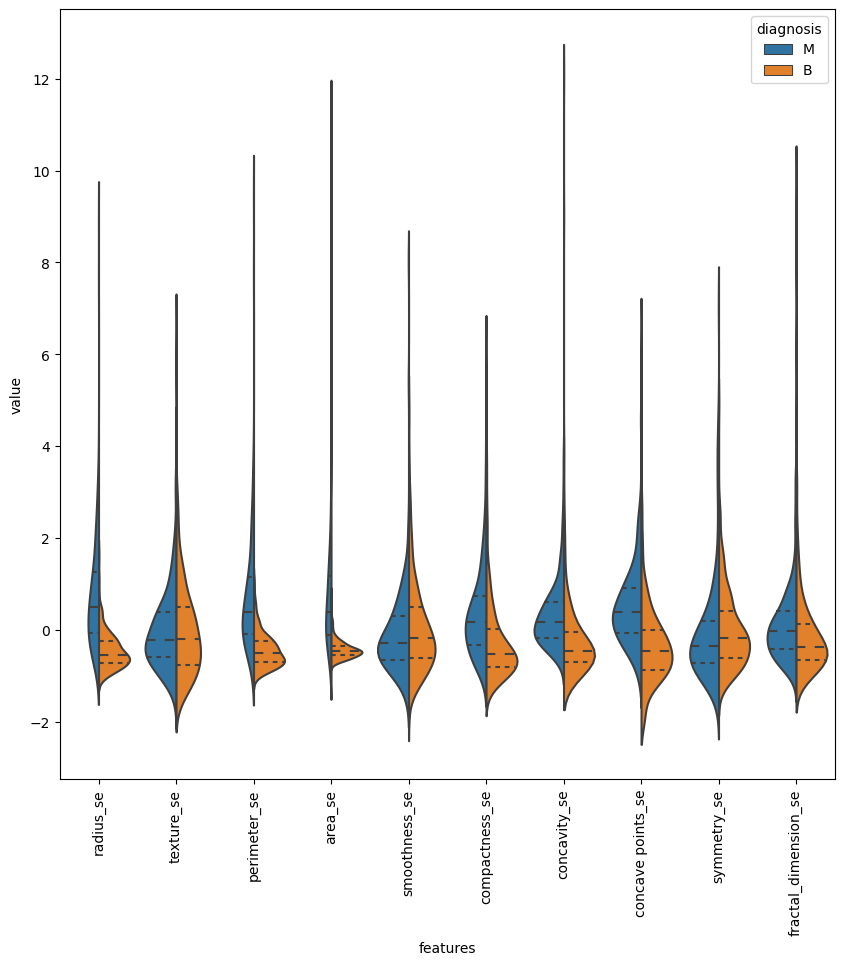

In [33]:
# Melt the DataFrame using the pd.melt() function to reshape it from wide to long format for visualization
data2 = pd.melt(concated_second, id_vars="diagnosis", var_name="features", value_name="value")

# Create a new figure for the violin plot with a specified size of 10x10 inches
plt.figure(figsize=(10, 10))

# Create a violin plot using seaborn's violinplot() function
# Set the x-axis to the "features" column, y-axis to the "value" column, and hue to the "diagnosis" column
# Use data as the input DataFrame for plotting
# Set split=True to separate the violins for different values of "diagnosis"
# Set inner="quart" to show quartiles inside the violins
sns.violinplot(x="features", y="value", hue="diagnosis", data=data2, split=True, inner="quart")

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

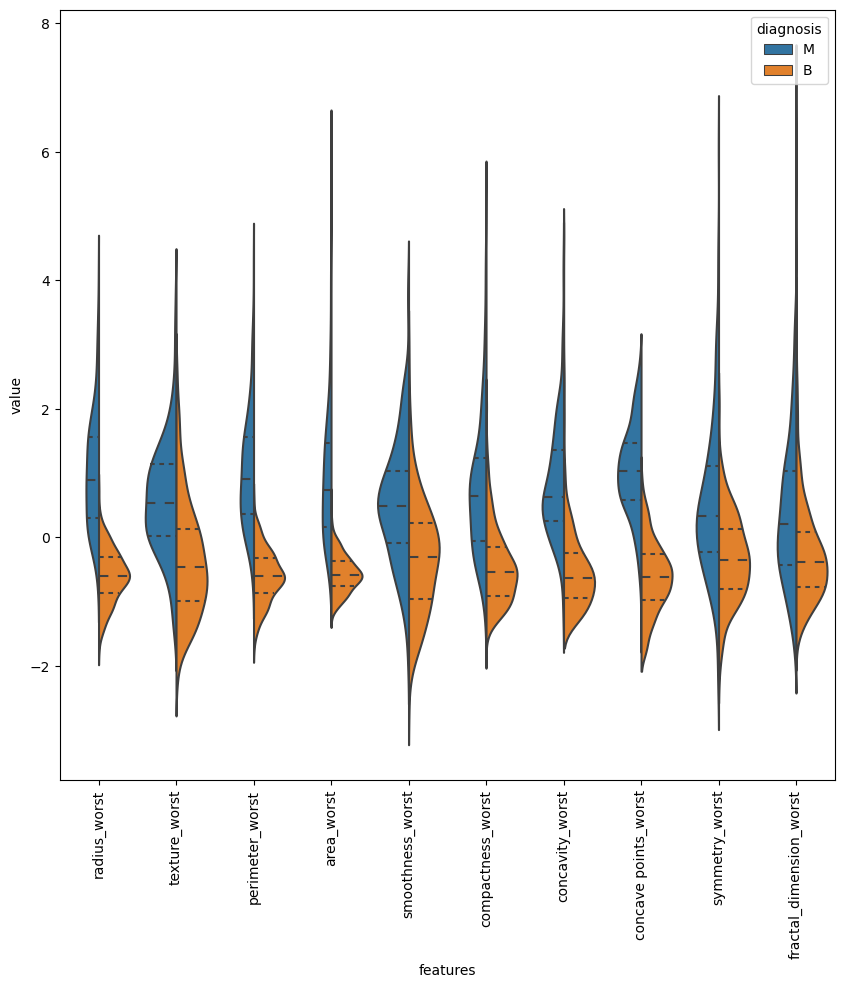

In [32]:
# Melt the DataFrame using the pd.melt() function to reshape it from wide to long format for visualization
data3 = pd.melt(concated_third, id_vars="diagnosis", var_name="features", value_name="value")

# Create a new figure for the violin plot with a specified size of 10x10 inches
plt.figure(figsize=(10, 10))

# Create a violin plot using seaborn's violinplot() function
# Set the x-axis to the "features" column, y-axis to the "value" column, and hue to the "diagnosis" column
# Use data as the input DataFrame for plotting
# Set split=True to separate the violins for different values of "diagnosis"
# Set inner="quart" to show quartiles inside the violins
sns.violinplot(x="features", y="value", hue="diagnosis", data=data3, split=True, inner="quart")

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)


&emsp;**Anothor way to analyze it that. Using box plots. Box plots are also useful in terms of seeing outliers**  
I will visualize all features below you can also check it for your analyzises 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

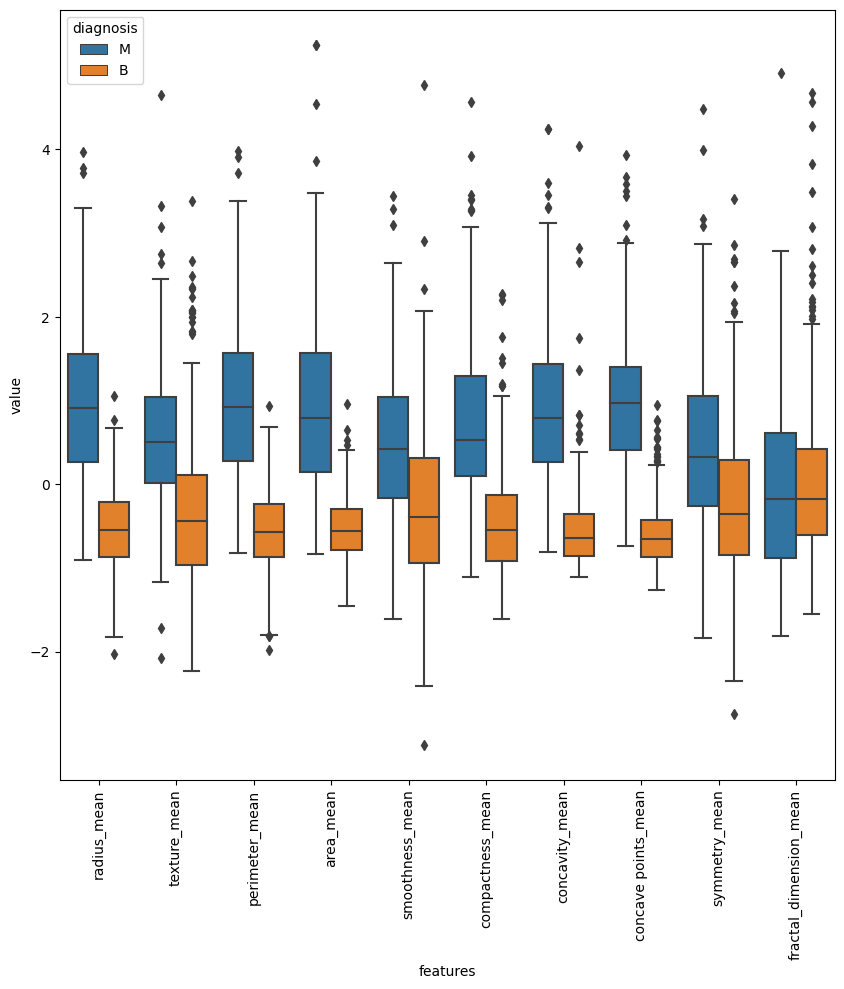

In [47]:
# Create a new figure with a specified size of 10x10 inches
plt.figure(figsize=(10, 10))

# Create a box plot using seaborn's boxplot() function
# Set the x-axis to the "features" column, y-axis to the "value" column, and hue to the "diagnosis" column
# Use data as the input DataFrame for plotting
sns.boxplot(x="features", y="value", hue="diagnosis", data=data1)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

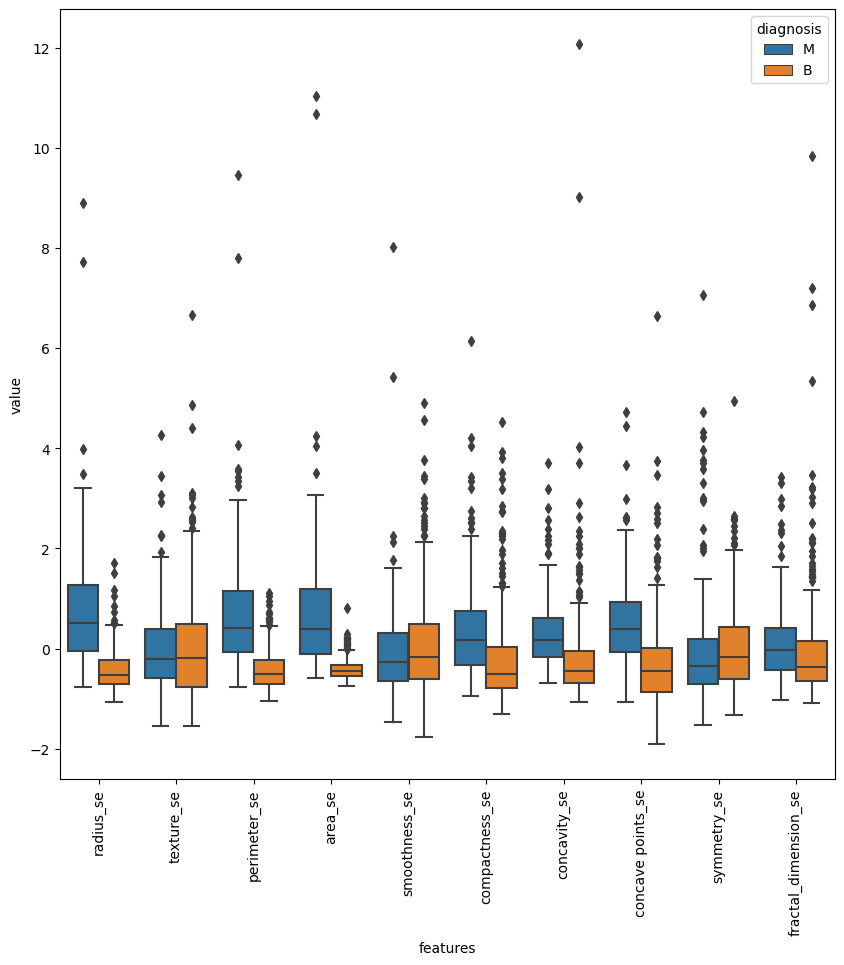

In [45]:
# Create a new figure with a specified size of 10x10 inches
plt.figure(figsize=(10, 10))

# Create a box plot using seaborn's boxplot() function
# Set the x-axis to the "features" column, y-axis to the "value" column, and hue to the "diagnosis" column
# Use data as the input DataFrame for plotting
sns.boxplot(x="features", y="value", hue="diagnosis", data=data2)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

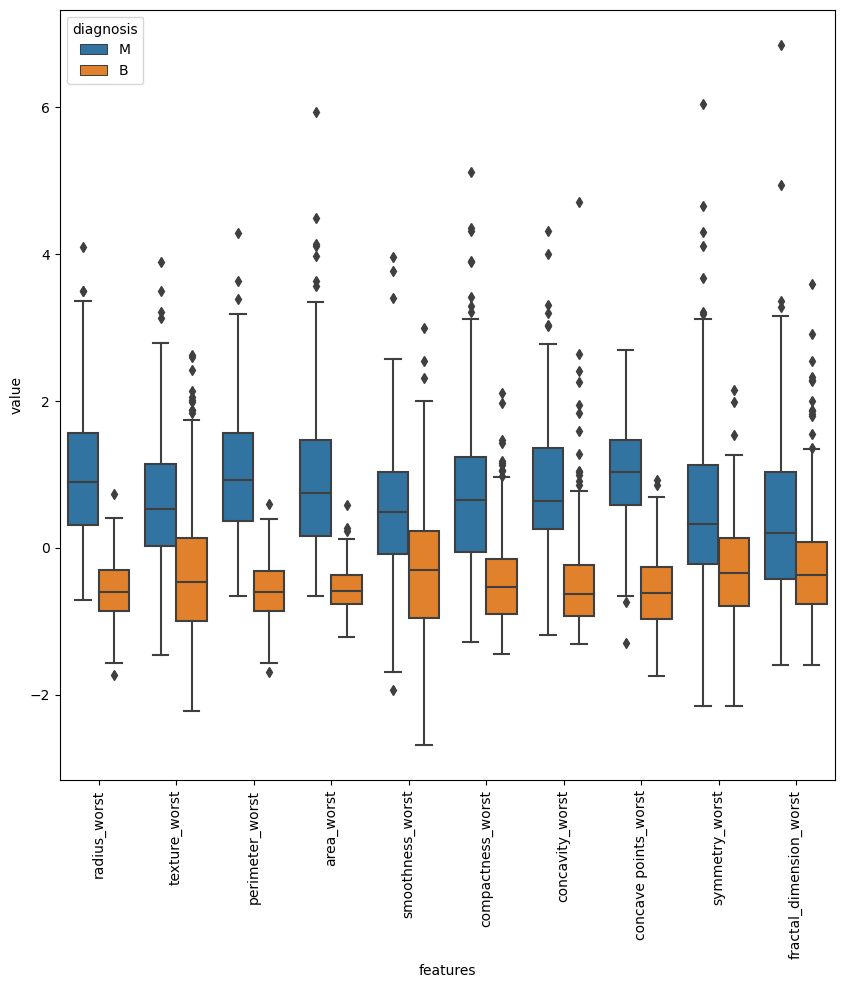

In [46]:
# Create a new figure with a specified size of 10x10 inches
plt.figure(figsize=(10, 10))

# Create a box plot using seaborn's boxplot() function
# Set the x-axis to the "features" column, y-axis to the "value" column, and hue to the "diagnosis" column
# Use data as the input DataFrame for plotting
sns.boxplot(x="features", y="value", hue="diagnosis", data=data3)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

Lets interpret one more thing about plot above, variable of **concavity_worst** and **concave point_worst** looks like similar but how can we decide whether they are correlated with each other or not.
(Not always true but, basically if the features are correlated with each other we can drop one of them)

In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated.
<br>
Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated.  
Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

<Figure size 1500x1000 with 0 Axes>

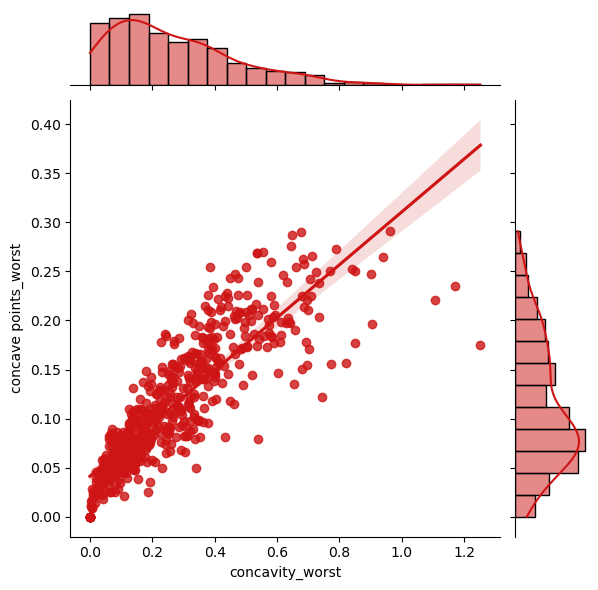

In [43]:
# Create a figure with a specified size of 15x10 inches
plt.figure(figsize=(15,10))

# Create a joint plot using seaborn's jointplot() function
# Set the x-axis to the "concavity_worst" column, y-axis to the "concave points_worst" column
# Use kind="reg" to include a regression line and color="#ce1414" to specify the color
sns.jointplot(data=x, x="concavity_worst", y="concave points_worst", kind="reg", color="#ce1414")

# Display the plot
plt.show()


What about three or more feauture comparision ? For this purpose we can use pair grid plot. Also it seems very cool :) And we discover one more thing radius_worst, perimeter_worst and area_worst are correlated as it can be seen pair grid plot. We definetely use these discoveries for feature selection.

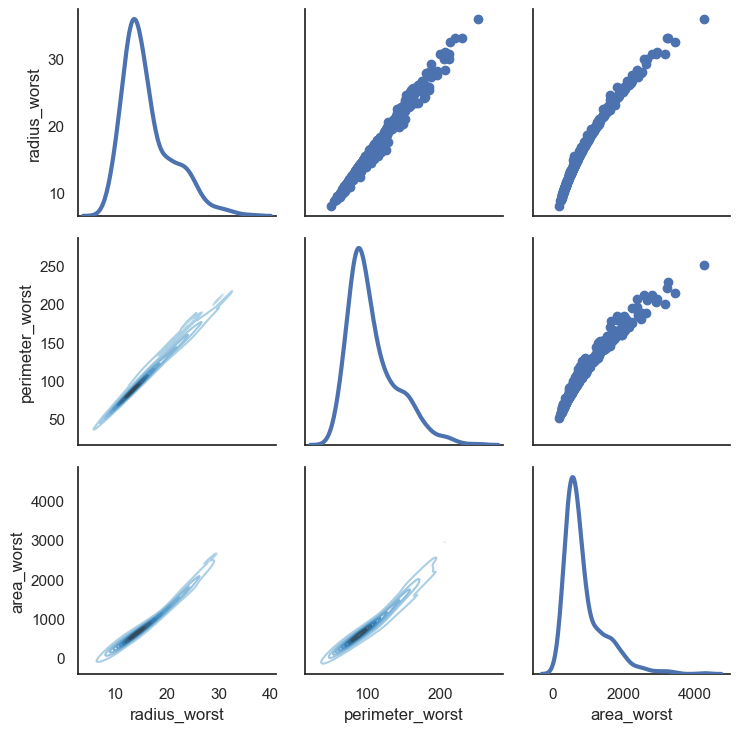

In [49]:
# Set the style of the plot to "white"
sns.set(style="white")

# Select the desired columns from the DataFrame
df = x.loc[:, ["radius_worst", "perimeter_worst", "area_worst"]]

# Create a PairGrid with the DataFrame, where the diagonal plots are not shared
g = sns.PairGrid(df, diag_sharey=False)

# Plot Kernel Density Estimation (KDE) in the lower triangle of the PairGrid, using the "Blues_d" colormap
g.map_lower(sns.kdeplot, cmap="Blues_d")

# Plot scatter plots in the upper triangle of the PairGrid
g.map_upper(plt.scatter)

# Plot KDE in the diagonal of the PairGrid, with a line width of 3
g.map_diag(sns.kdeplot, lw=3)
